In [ ]:
# Εισαγωγή βιβλιοθηκών
import numpy as np  # Για μαθηματικές πράξεις και πίνακες
import matplotlib.pyplot as plt  # Για οπτικοποίηση εικόνων
import cv2 as cv  # OpenCV - Για επεξεργασία εικόνων
import os  # Για διαχείριση αρχείων

# Ρυθμίσεις για την εμφάνιση των γραφημάτων
plt.rcParams['figure.figsize'] = (16, 8)  # Μέγεθος παραθύρου σε inches (πλάτος, ύψος)
plt.rcParams['figure.dpi'] = 100  # Ανάλυση εικόνας (dots per inch)

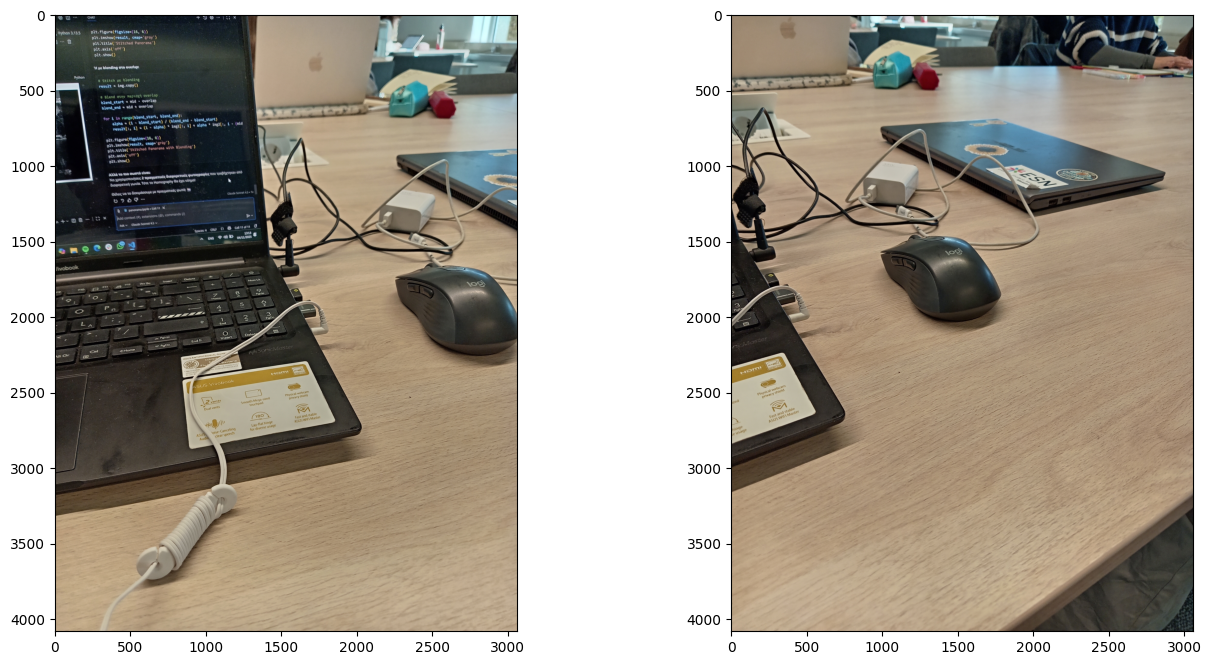

In [70]:
# Φόρτωση των δύο εικόνων
img1 = plt.imread("1.jpg")  # Φόρτωση της αριστερής εικόνας (RGB format)
img2 = plt.imread("2.jpg")  # Φόρτωση της δεξιάς εικόνας (RGB format)

# Δημιουργία παραθύρου με 2 subplots (1 γραμμή, 2 στήλες)
fig, ax = plt.subplots(1, 2)  # fig=το παράθυρο, ax=array με τα 2 άξονες
ax[0].imshow(img1, cmap='gray')  # Εμφάνιση της 1ης εικόνας στον πρώτο άξονα
ax[1].imshow(img2, cmap='gray')  # Εμφάνιση της 2ης εικόνας στον δεύτερο άξονα
plt.show()  # Άνοιγμα του παραθύρου για προβολή

SIFT Features

SIFT Feature Detection
 SIFT detector δημιουργήθηκε

 Αποτελέσματα:
  Image 1 - Keypoints: 27431
  Image 1 - Descriptors shape: (27431, 128)
  Image 2 - Keypoints: 17013
  Image 2 - Descriptors shape: (17013, 128)

 Παράδειγμα πρώτου keypoint από Image 1:
  Θέση (x, y): (2.3229410648345947, 1676.502685546875)
  Μέγεθος (size): 2.25
  Γωνία (angle): 18.99°
  Response (δύναμη): 0.0140

 Παράδειγμα descriptor (128 διαστάσεων):
  Πρώτα 10 στοιχεία: [20. 13.  0.  0.  0.  0.  1.  7. 78. 54.]

 Αποτελέσματα:
  Image 1 - Keypoints: 27431
  Image 1 - Descriptors shape: (27431, 128)
  Image 2 - Keypoints: 17013
  Image 2 - Descriptors shape: (17013, 128)

 Παράδειγμα πρώτου keypoint από Image 1:
  Θέση (x, y): (2.3229410648345947, 1676.502685546875)
  Μέγεθος (size): 2.25
  Γωνία (angle): 18.99°
  Response (δύναμη): 0.0140

 Παράδειγμα descriptor (128 διαστάσεων):
  Πρώτα 10 στοιχεία: [20. 13.  0.  0.  0.  0.  1.  7. 78. 54.]


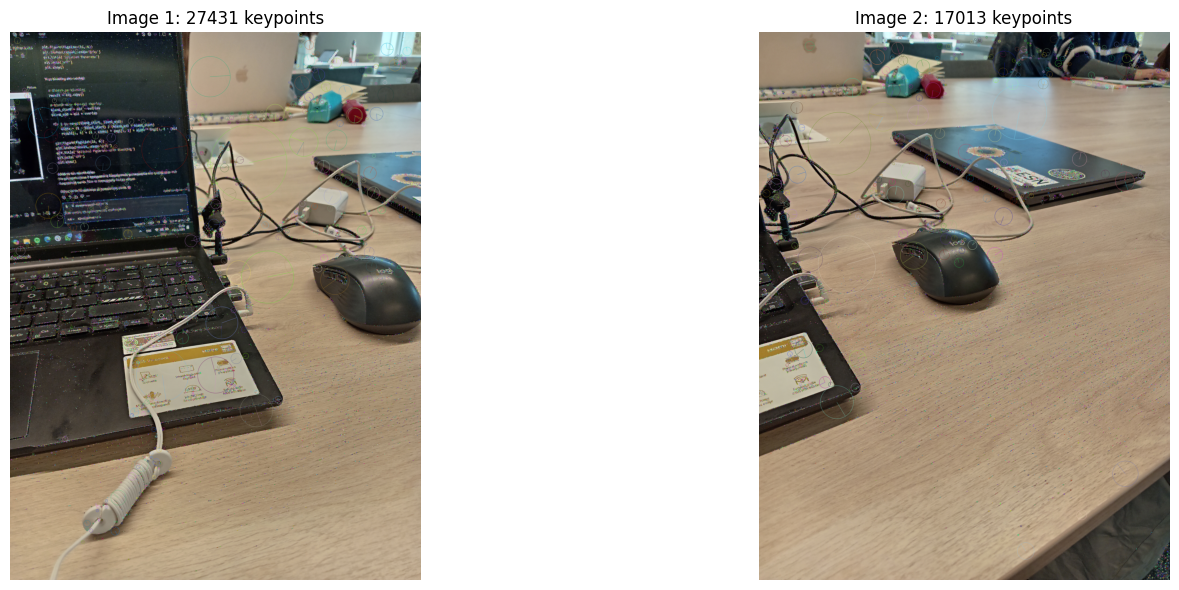


 Σημείωση:
  - Μεγαλύτεροι κύκλοι = features σε μεγαλύτερη κλίμακα
  - Γραμμές = κατεύθυνση του feature (orientation)
  - Περισσότερα keypoints = πιο πλούσια περιοχή σε λεπτομέρειες


In [65]:
print("=" * 60)
print("SIFT Feature Detection")
print("=" * 60)

# Δημιουργία SIFT detector (Scale-Invariant Feature Transform)
sift = cv.SIFT_create()  # Αλγόριθμος που βρίσκει χαρακτηριστικά σημεία (features)
print(" SIFT detector δημιουργήθηκε")

# Εύρεση keypoints και descriptors για την εικόνα 1
keypoint1, descriptor1 = sift.detectAndCompute(img1, None)
# keypoint1 = λίστα με τις θέσεις (x,y) των ενδιαφέροντων σημείων
# descriptor1 = πίνακας που περιγράφει κάθε keypoint (σαν "ταυτότητα" του)
# None = δεν χρησιμοποιούμε mask (ψάχνουμε σε όλη την εικόνα)

# Εύρεση keypoints και descriptors για την εικόνα 2
keypoint2, descriptor2 = sift.detectAndCompute(img2, None)

# Εκτύπωση πληροφοριών
print(f"\n Αποτελέσματα:")
print(f"  Image 1 - Keypoints: {len(keypoint1)}")
print(f"  Image 1 - Descriptors shape: {descriptor1.shape}")
print(f"  Image 2 - Keypoints: {len(keypoint2)}")
print(f"  Image 2 - Descriptors shape: {descriptor2.shape}")

# Παραδείγματα keypoints
print(f"\n Παράδειγμα πρώτου keypoint από Image 1:")
kp = keypoint1[0]
print(f"  Θέση (x, y): {kp.pt}")
print(f"  Μέγεθος (size): {kp.size:.2f}")
print(f"  Γωνία (angle): {kp.angle:.2f}°")
print(f"  Response (δύναμη): {kp.response:.4f}")

print(f"\n Παράδειγμα descriptor (128 διαστάσεων):")
print(f"  Πρώτα 10 στοιχεία: {descriptor1[0][:10]}")

# Οπτικοποίηση των keypoints
img1_kp = cv.drawKeypoints(img1, keypoint1, None, 
                            flags=cv.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
# flags=DRAW_RICH_KEYPOINTS: Σχεδιάζει κύκλους με μέγεθος και κατεύθυνση

img2_kp = cv.drawKeypoints(img2, keypoint2, None, 
                            flags=cv.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

fig, ax = plt.subplots(1, 2, figsize=(18, 6))
ax[0].imshow(img1_kp)
ax[0].set_title(f'Image 1: {len(keypoint1)} keypoints')
ax[0].axis('off')

ax[1].imshow(img2_kp)
ax[1].set_title(f'Image 2: {len(keypoint2)} keypoints')
ax[1].axis('off')

plt.tight_layout()
plt.show()

print("\n Σημείωση:")
print("  - Μεγαλύτεροι κύκλοι = features σε μεγαλύτερη κλίμακα")
print("  - Γραμμές = κατεύθυνση του feature (orientation)")
print("  - Περισσότερα keypoints = πιο πλούσια περιοχή σε λεπτομέρειες")

FLANN Matching

FLANN Matching & Ratio Test
 FLANN matcher δημιουργήθηκε με:
  - Algorithm: KD-Tree
  - Trees: 5
  - Checks: 50

 Αναζήτηση matches...
 Βρέθηκαν 27431 matches (2 για κάθε keypoint)

 Παράδειγμα 1ου match:
  Καλύτερο ταίριασμα (m):
    - Distance: 355.96
    - Query index (img1): 0
    - Train index (img2): 346
  2ο καλύτερο ταίριασμα (n):
    - Distance: 385.97
  Ratio (m/n): 0.922

 Ratio Test (Lowe's test):
  Κριτήριο: m.distance < 0.7 × n.distance

 Αποτελέσματα Ratio Test:
   Passed (good matches): 914
   Failed (rejected): 26517
   Success rate: 3.3%
 Βρέθηκαν 27431 matches (2 για κάθε keypoint)

 Παράδειγμα 1ου match:
  Καλύτερο ταίριασμα (m):
    - Distance: 355.96
    - Query index (img1): 0
    - Train index (img2): 346
  2ο καλύτερο ταίριασμα (n):
    - Distance: 385.97
  Ratio (m/n): 0.922

 Ratio Test (Lowe's test):
  Κριτήριο: m.distance < 0.7 × n.distance

 Αποτελέσματα Ratio Test:
   Passed (good matches): 914
   Failed (rejected): 26517
   Success rate: 3.3%


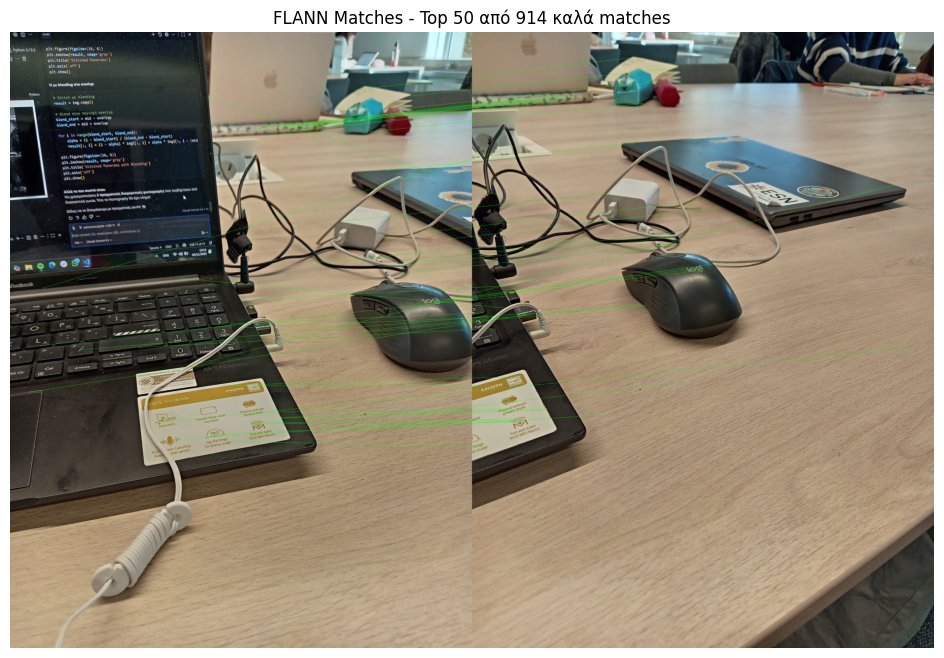


 Στην εικόνα:
  - Πράσινες γραμμές = matches που πέρασαν το ratio test
  - Κάθε γραμμή συνδέει ένα keypoint από img1 με img2
  - Μικρότερη απόσταση = καλύτερο match


In [66]:
print("=" * 60)
print("FLANN Matching & Ratio Test")
print("=" * 60)

# Ρυθμίσεις για τον FLANN matcher (Fast Library for Approximate Nearest Neighbors)
FLANN_INDEX_KDTREE = 1  # Τύπος αλγορίθμου: KD-Tree (για SIFT/SURF descriptors)

# Παράμετροι για την δομή του index (πώς οργανώνονται τα δεδομένα)
index_params = dict(algorithm=FLANN_INDEX_KDTREE, trees=5)
# algorithm = τύπος αλγορίθμου
# trees = αριθμός δέντρων (περισσότερα = πιο ακριβής αλλά πιο αργό)

# Παράμετροι για την αναζήτηση
search_params = dict(checks=50)
# checks = πόσες φορές να ελέγξει (περισσότερα = πιο ακριβής)

print(" FLANN matcher δημιουργήθηκε με:")
print(f"  - Algorithm: KD-Tree")
print(f"  - Trees: {index_params['trees']}")
print(f"  - Checks: {search_params['checks']}")

# Δημιουργία του FLANN matcher με τις παραπάνω ρυθμίσεις
flann = cv.FlannBasedMatcher(index_params, search_params)

# Εύρεση των k=2 καλύτερων ταιριασμάτων για κάθε descriptor της img1
print(f"\n Αναζήτηση matches...")
matches = flann.knnMatch(descriptor1, descriptor2, k=2)
# descriptor1 = descriptors από img1 (query)
# descriptor2 = descriptors από img2 (train)
# k=2 = βρες τα 2 πιο κοντινά ταιριάσματα για ratio test

print(f" Βρέθηκαν {len(matches)} matches (2 για κάθε keypoint)")

# Παράδειγμα πρώτου match
print(f"\n Παράδειγμα 1ου match:")
m, n = matches[0]
print(f"  Καλύτερο ταίριασμα (m):")
print(f"    - Distance: {m.distance:.2f}")
print(f"    - Query index (img1): {m.queryIdx}")
print(f"    - Train index (img2): {m.trainIdx}")
print(f"  2ο καλύτερο ταίριασμα (n):")
print(f"    - Distance: {n.distance:.2f}")
print(f"  Ratio (m/n): {m.distance/n.distance:.3f}")

# Ratio test (Lowe's test) - Φιλτράρισμα κακών ταιριασμάτων
print(f"\n Ratio Test (Lowe's test):")
print(f"  Κριτήριο: m.distance < 0.7 × n.distance")

good = []  # Λίστα για τα καλά ταιριάσματα
ratio_threshold = 0.7
passed = 0
failed = 0

for m, n in matches:  # m=καλύτερο ταίριασμα, n=2ο καλύτερο
    ratio = m.distance / n.distance
    if m.distance < ratio_threshold * n.distance:  # Αν το m είναι τουλάχιστον 30% καλύτερο από το n
        good.append(m)  # Κράτα το ως καλό ταίριασμα
        passed += 1
    else:
        failed += 1

print(f"\n Αποτελέσματα Ratio Test:")
print(f"   Passed (good matches): {passed}")
print(f"   Failed (rejected): {failed}")
print(f"   Success rate: {passed/len(matches)*100:.1f}%")

# Οπτικοποίηση των καλών matches
# Πάρε μόνο τα 50 καλύτερα για καθαρότερη εικόνα
good_to_draw = sorted(good, key=lambda x: x.distance)[:50]

img_matches = cv.drawMatches(
    img1, keypoint1,  # Query image και keypoints
    img2, keypoint2,  # Train image και keypoints
    good_to_draw,     # Τα matches που θα σχεδιαστούν
    None,             # Output image (None = δημιουργία νέας)
    matchColor=(0, 255, 0),  # Πράσινο για τις γραμμές
    singlePointColor=(255, 0, 0),  # Κόκκινο για μεμονωμένα σημεία
    flags=cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS  # Μην σχεδιάσεις μεμονωμένα
)

plt.figure(figsize=(20, 8))
plt.imshow(img_matches)
plt.title(f'FLANN Matches - Top 50 από {len(good)} καλά matches')
plt.axis('off')
plt.show()

print(f"\n Στην εικόνα:")
print(f"  - Πράσινες γραμμές = matches που πέρασαν το ratio test")
print(f"  - Κάθε γραμμή συνδέει ένα keypoint από img1 με img2")
print(f"  - Μικρότερη απόσταση = καλύτερο match")

Homography

In [67]:
# Υπολογισμός Homography Matrix (πίνακας μετασχηματισμού 3x3)
# Θέλουμε να μετασχηματίσουμε την img2 στο χώρο της img1

# Εξαγωγή των συντεταγμένων των keypoints από την img2 (source points)
src_pts = np.float32([keypoint2[m.trainIdx].pt for m in good]).reshape(-1, 1, 2)
# np.float32() = μετατροπή σε float32 για το OpenCV
# [ ... for m in good] = list comprehension - επανάληψη για κάθε match στη λίστα good
# keypoint2[m.trainIdx] = το keypoint από την img2 που ταιριάζει
# .pt = property που επιστρέφει τη θέση (x, y) του keypoint
# .reshape(-1, 1, 2) = αλλαγή σχήματος σε (N, 1, 2) όπου N=αριθμός matches

# Εξαγωγή των συντεταγμένων των keypoints από την img1 (destination points)
dst_pts = np.float32([keypoint1[m.queryIdx].pt for m in good]).reshape(-1, 1, 2)
# keypoint1[m.queryIdx] = το keypoint από την img1 που ταιριάζει
# Τα υπόλοιπα όπως παραπάνω

# Υπολογισμός του Homography matrix με RANSAC
M, mask = cv.findHomography(src_pts, dst_pts, cv.RANSAC, 5.0)
# src_pts = σημεία από img2
# dst_pts = αντίστοιχα σημεία από img1
# cv.RANSAC = αλγόριθμος που αγνοεί τα λάθος ταιριάσματα (outliers)
# 5.0 = threshold σε pixels (αν η απόσταση > 5px, θεωρείται outlier)
# M = το Homography matrix (3x3)
# mask = array που δείχνει ποια matches είναι inliers (1) και ποια outliers (0)

print("Homography Matrix:")
print(M)

Homography Matrix:
[[ 6.64184108e-01  7.79291721e-03  1.37388648e+03]
 [-9.58687430e-02  8.87239710e-01  2.80125827e+02]
 [-9.61408209e-05  2.59493687e-06  1.00000000e+00]]


Stitch

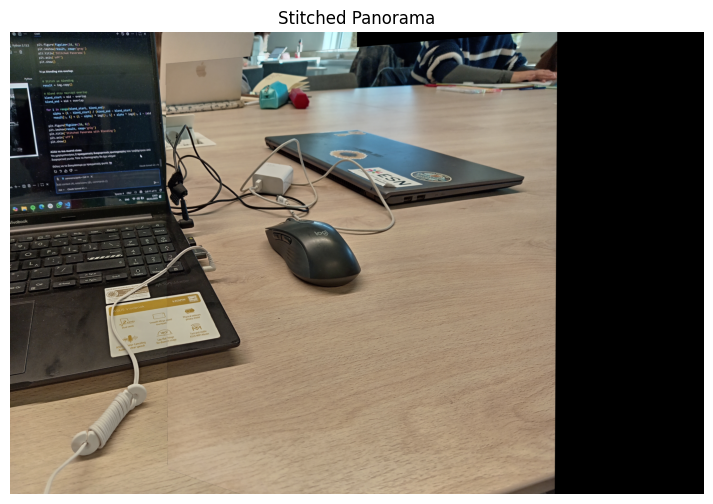

In [68]:
# Image Stitching - Ένωση των δύο εικόνων

# Λήψη των διαστάσεων των εικόνων
h1, w1 = img1.shape[:2]  # ύψος και πλάτος της img1 ([:2] = τα 2 πρώτα στοιχεία)
h2, w2 = img2.shape[:2]  # ύψος και πλάτος της img2
max_h = max(h1, h2)  # Μέγιστο ύψος μεταξύ των 2 εικόνων

# Warp (παραμόρφωση) της img2 στο χώρο της img1
result = cv.warpPerspective(img2, M, (w1 + w2, max_h))
# img2 = η εικόνα που θα μετασχηματιστεί
# M = το Homography matrix
# (w1 + w2, max_h) = το μέγεθος του output canvas (πλάτος, ύψος)
# result = το warped αποτέλεσμα (η img2 μετασχηματισμένη)

# Τοποθέτηση της img1 στην αριστερή πλευρά του canvas
result[0:h1, 0:w1] = np.where(
    # np.where(condition, value_if_true, value_if_false) = conditional assignment
    result[0:h1, 0:w1].sum(axis=2, keepdims=True) == 0,
    # result[0:h1, 0:w1] = περιοχή του result όσο μεγάλη είναι η img1
    # .sum(axis=2, keepdims=True) = άθροισμα των 3 channels (R+G+B) για κάθε pixel
    # == 0 = έλεγχος αν το pixel είναι μαύρο (0,0,0)
    img1,  # Αν είναι μαύρο, βάλε pixel από την img1
    result[0:h1, 0:w1]  # Αλλιώς, κράτα το υπάρχον pixel από το result
)

# Οπτικοποίηση του τελικού αποτελέσματος
plt.figure(figsize=(20, 6))  # Δημιουργία νέου παραθύρου με μέγεθος 20x6 inches
plt.imshow(result)  # Εμφάνιση της ενωμένης εικόνας
plt.title('Stitched Panorama')  # Τίτλος
plt.axis('off')  # Απόκρυψη των αξόνων (x, y)
plt.show()  # Άνοιγμα του παραθύρου

Απλό Cropping (Βρες το bounding box)

ΒΗΜΑ 1: Μετατροπή σε Grayscale
Διαστάσεις original: (4080, 6120, 3)
Διαστάσεις grayscale: (4080, 6120)


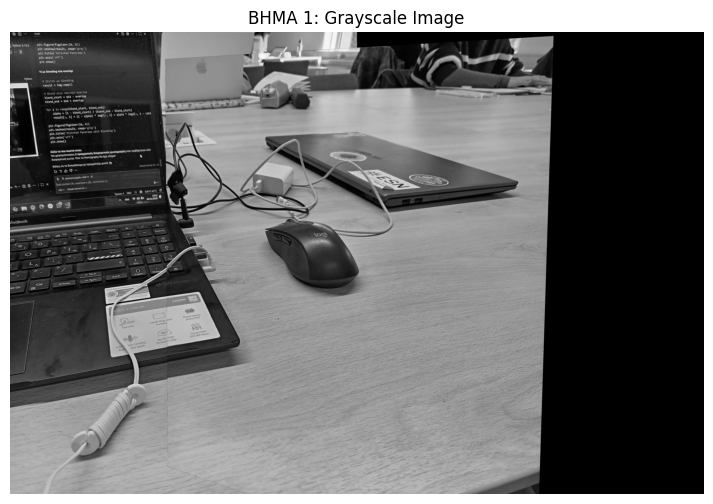

In [57]:
# Cropping - Αφαίρεση μαύρων περιοχών με οπτικοποίηση κάθε βήματος

print("=" * 60)
print("ΒΗΜΑ 1: Μετατροπή σε Grayscale")
print("=" * 60)

# Μετατροπή σε grayscale για ευκολότερο detection
gray = cv.cvtColor(result, cv.COLOR_RGB2GRAY)
# cv.cvtColor() = μετατροπή χρωματικού χώρου
# result = η ενωμένη έγχρωμη εικόνα (RGB με 3 channels)
# cv.COLOR_RGB2GRAY = από RGB (3 channels) σε grayscale (1 channel)
# gray = η γκρίζα εικόνα (2D array αντί για 3D)

print(f"Διαστάσεις original: {result.shape}")  # (height, width, 3)
print(f"Διαστάσεις grayscale: {gray.shape}")  # (height, width)

# Οπτικοποίηση της grayscale εικόνας
plt.figure(figsize=(20, 6))
plt.imshow(gray, cmap='gray')  # cmap='gray' = εμφάνιση ως γκρίζο
plt.title('ΒΗΜΑ 1: Grayscale Image')
plt.axis('off')
plt.show()




ΒΗΜΑ 2: Binary Thresholding
Unique values στο thresh: [  0 255]
Αριθμός μη-μαύρων pixels: 19100791
Αριθμός μαύρων pixels: 5868809


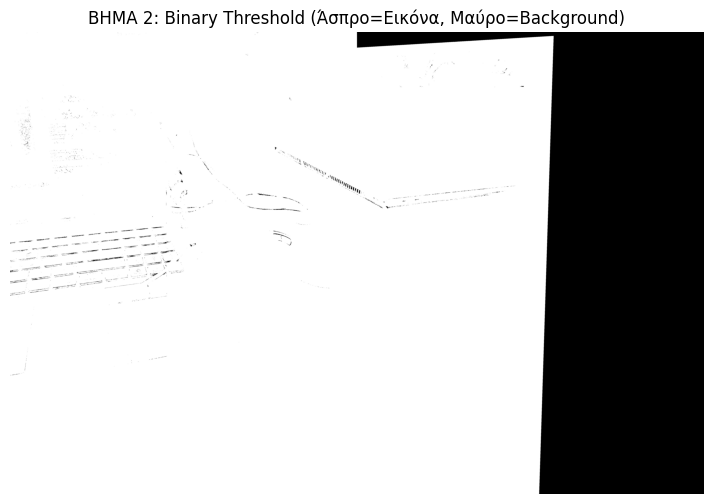

In [58]:
print("\n" + "=" * 60)
print("ΒΗΜΑ 2: Binary Thresholding")
print("=" * 60)

# Threshold: Βρες όλα τα pixels που ΔΕΝ είναι μαύρα (>0)
_, thresh = cv.threshold(gray, 1, 255, cv.THRESH_BINARY)
# cv.threshold(src, thresh, maxval, type) = μετατροπή σε binary image
# gray = input image (grayscale)
# 1 = threshold value (όριο: αν pixel > 1, γίνεται 255, αλλιώς 0)
# 255 = max value (η τιμή που παίρνουν τα pixels που περνάνε το threshold)
# cv.THRESH_BINARY = binary thresholding (0 ή 255)
# _ = το threshold value που χρησιμοποιήθηκε (δεν το χρειαζόμαστε)
# thresh = binary mask (255 = μη-μαύρα pixels, 0 = μαύρα pixels)

print(f"Unique values στο thresh: {np.unique(thresh)}")  # [0, 255]
print(f"Αριθμός μη-μαύρων pixels: {np.count_nonzero(thresh)}")
print(f"Αριθμός μαύρων pixels: {np.sum(thresh == 0)}")

# Οπτικοποίηση του binary mask
plt.figure(figsize=(20, 6))
plt.imshow(thresh, cmap='gray')
plt.title('ΒΗΜΑ 2: Binary Threshold (Άσπρο=Εικόνα, Μαύρο=Background)')
plt.axis('off')
plt.show()




ΒΗΜΑ 3: Εύρεση Contours
Αριθμός contours που βρέθηκαν: 3
  Contour 0: 4 σημεία
  Contour 1: 1 σημεία
  Contour 2: 679 σημεία


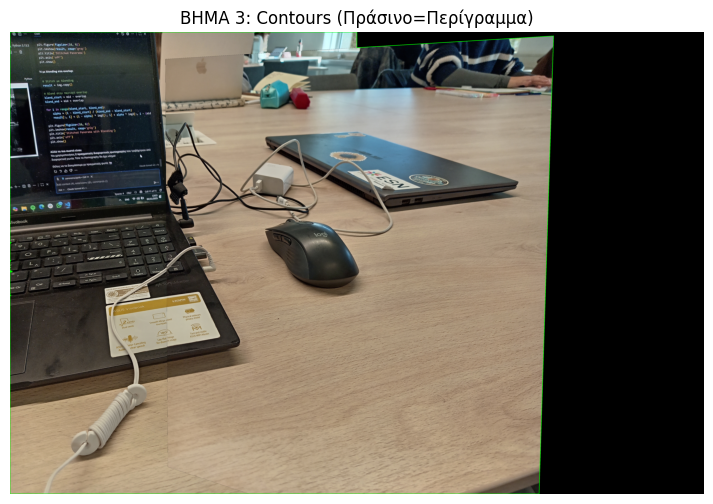

In [59]:
print("\n" + "=" * 60)
print("ΒΗΜΑ 3: Εύρεση Contours")
print("=" * 60)

# Βρες contours (περιγράμματα) των μη-μαύρων περιοχών
contours, _ = cv.findContours(thresh, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
# cv.findContours(image, mode, method) = βρίσκει περιγράμματα
# thresh = binary image (πρέπει να είναι 0 ή 255)
# cv.RETR_EXTERNAL = μόνο τα εξωτερικά contours (όχι τα εσωτερικά)
# cv.CHAIN_APPROX_SIMPLE = απλοποίηση: κρατάει μόνο τα σημεία των γωνιών
# contours = λίστα με contours (κάθε contour = array με σημεία)
# _ = hierarchy (δεν το χρειαζόμαστε)

print(f"Αριθμός contours που βρέθηκαν: {len(contours)}")
for i, cnt in enumerate(contours):
    print(f"  Contour {i}: {len(cnt)} σημεία")

# Σχεδίασε τα contours πάνω στην εικόνα
result_with_contours = result.copy()
cv.drawContours(result_with_contours, contours, -1, (0, 255, 0), 3)
# drawContours(image, contours, contourIdx, color, thickness)
# -1 = σχεδίασε όλα τα contours
# (0, 255, 0) = πράσινο χρώμα (RGB)
# 3 = πάχος γραμμής

plt.figure(figsize=(20, 6))
plt.imshow(result_with_contours)
plt.title('ΒΗΜΑ 3: Contours (Πράσινο=Περίγραμμα)')
plt.axis('off')
plt.show()




ΒΗΜΑ 4: Υπολογισμός Bounding Box
Bounding Box:
  x (αρχή x): 0
  y (αρχή y): 0
  w (πλάτος): 4794
  h (ύψος): 4080
  Τέλος x: 4794
  Τέλος y: 4080


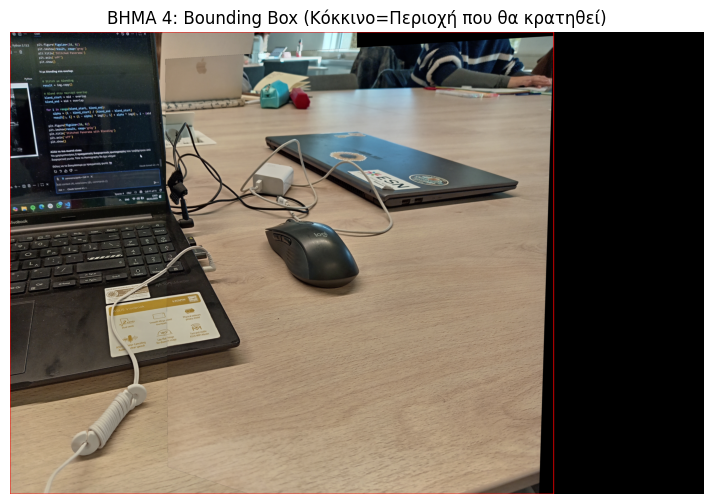

In [60]:
print("\n" + "=" * 60)
print("ΒΗΜΑ 4: Υπολογισμός Bounding Box")
print("=" * 60)

# Βρες το bounding box (ορθογώνιο που περικλείει όλα τα contours)
x, y, w, h = cv.boundingRect(np.concatenate(contours))
# cv.boundingRect(points) = επιστρέφει το ελάχιστο ορθογώνιο
# np.concatenate(contours) = ενώνει όλα τα contours σε 1 array
# x, y = top-left γωνία του ορθογωνίου (συντεταγμένες)
# w = πλάτος του ορθογωνίου (width)
# h = ύψος του ορθογωνίου (height)

print(f"Bounding Box:")
print(f"  x (αρχή x): {x}")
print(f"  y (αρχή y): {y}")
print(f"  w (πλάτος): {w}")
print(f"  h (ύψος): {h}")
print(f"  Τέλος x: {x + w}")
print(f"  Τέλος y: {y + h}")

# Σχεδίασε το bounding box
result_with_bbox = result.copy()
cv.rectangle(result_with_bbox, (x, y), (x+w, y+h), (255, 0, 0), 5)
# rectangle(image, pt1, pt2, color, thickness)
# (x, y) = top-left γωνία
# (x+w, y+h) = bottom-right γωνία
# (255, 0, 0) = κόκκινο χρώμα
# 5 = πάχος γραμμής

plt.figure(figsize=(20, 6))
plt.imshow(result_with_bbox)
plt.title('ΒΗΜΑ 4: Bounding Box (Κόκκινο=Περιοχή που θα κρατηθεί)')
plt.axis('off')
plt.show()




ΒΗΜΑ 5: Cropping
Διαστάσεις πριν το crop: (4080, 6120, 3)
Διαστάσεις μετά το crop: (4080, 4794, 3)
Μείωση πλάτους: 1326 pixels
Μείωση ύψους: 0 pixels


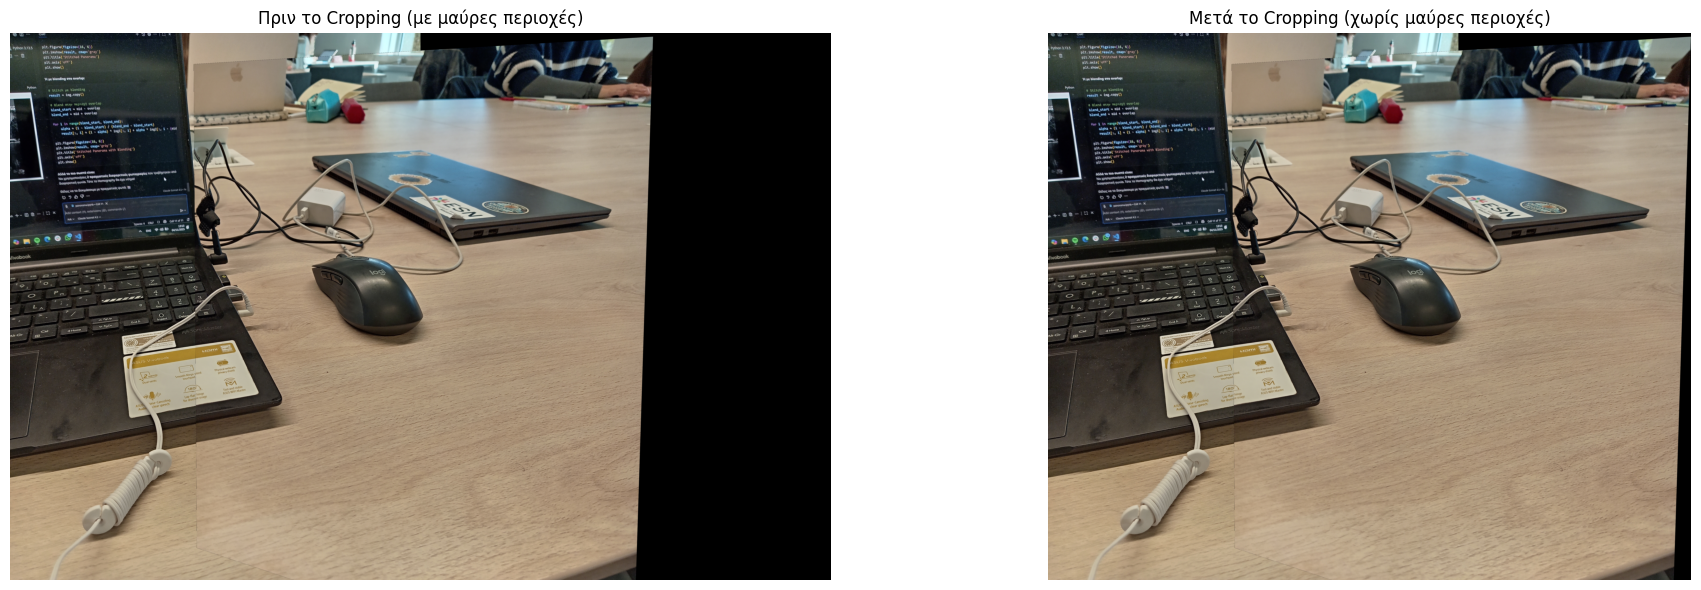

In [61]:
print("\n" + "=" * 60)
print("ΒΗΜΑ 5: Cropping")
print("=" * 60)

# Crop το αποτέλεσμα
result_cropped = result[y:y+h, x:x+w]
# [y:y+h, x:x+w] = array slicing (κόψιμο)
# [y:y+h] = από γραμμή y μέχρι γραμμή y+h (ύψος)
# [x:x+w] = από στήλη x μέχρι στήλη x+w (πλάτος)
# result_cropped = η cropped εικόνα (μόνο η περιοχή του bounding box)

print(f"Διαστάσεις πριν το crop: {result.shape}")
print(f"Διαστάσεις μετά το crop: {result_cropped.shape}")
print(f"Μείωση πλάτους: {result.shape[1] - result_cropped.shape[1]} pixels")
print(f"Μείωση ύψους: {result.shape[0] - result_cropped.shape[0]} pixels")

# Σύγκριση: Πριν vs Μετά
fig, ax = plt.subplots(1, 2, figsize=(20, 6))
ax[0].imshow(result)
ax[0].set_title('Πριν το Cropping (με μαύρες περιοχές)')
ax[0].axis('off')

ax[1].imshow(result_cropped)
ax[1].set_title('Μετά το Cropping (χωρίς μαύρες περιοχές)')
ax[1].axis('off')

plt.tight_layout()
plt.show()


ΒΗΜΑ 6: Τελικό Αποτέλεσμα


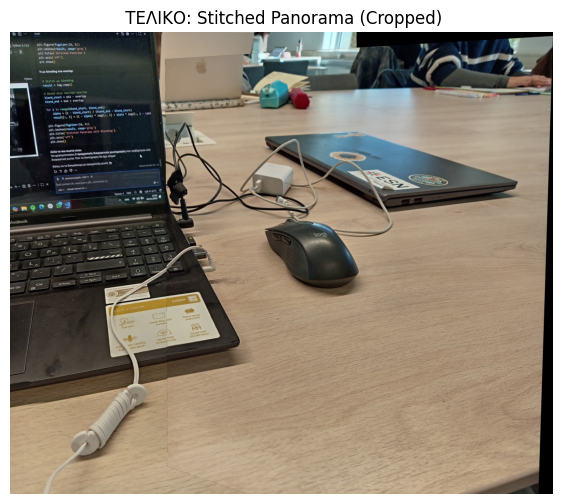


 Ολοκληρώθηκε! Τελικές διαστάσεις: (4080, 4794, 3)


In [62]:
print("\n" + "=" * 60)
print("ΒΗΜΑ 6: Τελικό Αποτέλεσμα")
print("=" * 60)

# Τελική οπτικοποίηση
plt.figure(figsize=(20, 6))
plt.imshow(result_cropped)
plt.title(' ΤΕΛΙΚΟ: Stitched Panorama (Cropped)')
plt.axis('off')
plt.show()

print(f"\n Ολοκληρώθηκε! Τελικές διαστάσεις: {result_cropped.shape}")

# 📝 Εξηγήσεις & Προβλήματα που Αντιμετωπίσαμε

## 🎯 Στόχος
Να δημιουργήσουμε ένα **panorama stitcher** που ενώνει 2 εικόνες με αλληλοεπικάλυψη χρησιμοποιώντας:
- **SIFT** για feature detection
- **FLANN** για feature matching
- **RANSAC** για φιλτράρισμα outliers
- **Homography** για υπολογισμό μετασχηματισμού
- **Perspective warping** για stitching

---

## ❌ Προβλήματα που είχαμε στην αρχή

### **1. Split Panorama Approach (Αρχική Ιδέα)**
**Τι δοκιμάσαμε:**
- Πήραμε μια πανοραμική εικόνα και την χωρίσαμε σε 2 τμήματα
- Προσπαθήσαμε να την ξανα-ενώσουμε

**Γιατί δεν δούλεψε:**
- Οι 2 εικόνες προέρχονταν από την **ίδια φωτογραφία** (δεν είχαν perspective difference)
- Το Homography matrix ήταν σχεδόν **identity matrix** (δεν έκανε σχεδόν τίποτα)
- Το αποτέλεσμα είχε μαύρες περιοχές και δεν ταίριαζε σωστά

**Λύση:** Χρησιμοποιήσαμε **2 πραγματικές διαφορετικές φωτογραφίες** τραβηγμένες από διαφορετική γωνία

---

### **2. Canvas Size Problem**
**Τι δοκιμάσαμε:**
```python
result = cv.warpPerspective(img1, M, (w, h))
```

**Γιατί δεν δούλεψε:**
- Το canvas ήταν πολύ μικρό για να χωρέσει η warped εικόνα
- Μέρος της εικόνας "κοβόταν"

**Λύση:**
```python
result = cv.warpPerspective(img2, M, (w1 + w2, max_h))
```
Φτιάξαμε canvas αρκετά μεγάλο για να χωρέσουν και οι 2 εικόνες

---

### **3. Wrong Stitching Order**
**Τι δοκιμάσαμε:**
```python
src_pts = np.float32([keypoint1[m.queryIdx].pt for m in good])
dst_pts = np.float32([keypoint2[m.trainIdx].pt for m in good])
```

**Γιατί δεν δούλεψε:**
- Η σειρά ήταν ανάποδη!
- Το img1 εμφανιζόταν δεξιά και το img2 αριστερά
- Το αποτέλεσμα ήταν ανάποδο

**Λύση:**
```python
src_pts = np.float32([keypoint2[m.trainIdx].pt for m in good])  # img2 → source
dst_pts = np.float32([keypoint1[m.queryIdx].pt for m in good])  # img1 → destination
```
Αντιστρέψαμε τη σειρά: warp την img2 στο χώρο της img1

---

### **4. Broadcasting Error**
**Τι δοκιμάσαμε:**
```python
result[0:h, mid-overlap:w] = img2[:, overlap:]
```

**Γιατί δεν δούλεψε:**
```
ValueError: could not broadcast input array from shape (589,512) into shape (589,632)
```
- Τα μεγέθη των arrays δεν ταίριαζαν
- Προσπαθούσαμε να βάλουμε 512 pixels σε χώρο 632 pixels

**Λύση:**
```python
result[0:h1, 0:w1] = np.where(
    result[0:h1, 0:w1].sum(axis=2, keepdims=True) == 0,
    img1,
    result[0:h1, 0:w1]
)
```
Χρησιμοποιήσαμε `np.where()` για conditional blending

---

### **5. Black Regions & Overlapping Issues**
**Τι δοκιμάσαμε:**
```python
result[:, mid:] = img2[:, overlap*2:]
```

**Γιατί δεν δούλεψε:**
- Υπήρχαν μαύρες περιοχές στο τελικό αποτέλεσμα
- Οι 2 εικόνες "καλύπτονταν" λάθος
- Δεν γινόταν σωστό blending

**Λύση:**
```python
# Βάζουμε img1 μόνο στις μαύρες περιοχές (όπου result == 0)
mask = result[0:h1, 0:w1].sum(axis=2, keepdims=True) == 0
result[0:h1, 0:w1] = np.where(mask, img1, result[0:h1, 0:w1])
```
Χρησιμοποιήσαμε mask για να βάλουμε την img1 μόνο όπου το result ήταν μαύρο

---

## ✅ Τελική Λύση που Δούλεψε

1. **Φόρτωση 2 διαφορετικών εικόνων** με αλληλοεπικάλυψη
2. **SIFT feature detection** στις 2 εικόνες
3. **FLANN matching** με k=2 για ratio test
4. **Ratio test (0.7)** για φιλτράρισμα κακών matches
5. **Homography με RANSAC** για υπολογισμό μετασχηματισμού
   - **Σωστή σειρά:** img2 (source) → img1 (destination)
6. **Warp της img2** σε canvas μεγέθους `(w1 + w2, max_h)`
7. **Conditional blending:** Βάλε img1 στις μαύρες περιοχές

---

## 🔑 Key Takeaways

### **Γιατί χρειάζεται Homography;**
- Οι εικόνες έχουν **διαφορετική προοπτική** (perspective)
- Το Homography υπολογίζει πώς να "ισιώσουμε" την img2 ώστε να ταιριάζει με την img1
- **Δεν χρειάζεται** αν οι εικόνες προέρχονται από split της ίδιας φωτογραφίας

### **Γιατί RANSAC;**
- Ακόμα κι αν υπάρχουν **λάθος matches** (outliers), το RANSAC τα αγνοεί
- Βρίσκει το **καλύτερο Homography** που ταιριάζει στα περισσότερα matches
- Χωρίς RANSAC, τα outliers θα κατέστρεφαν το αποτέλεσμα

### **Γιατί Ratio Test (0.7);**
- Φιλτράρει matches που είναι **ασαφή**
- Κρατάει μόνο matches όπου το καλύτερο είναι **πολύ καλύτερο** από το 2ο καλύτερο
- Αυξάνει την **αξιοπιστία** των matches

### **Conditional Blending με np.where()**
- Βάζουμε img1 **μόνο όπου το result είναι μαύρο**
- Αποφεύγουμε την επικάλυψη των 2 εικόνων
- Δημιουργεί ομαλή μετάβαση στο overlap region

---

## 🚀 Πιθανές Βελτιώσεις

1. **Feathering Blending:** Ομαλή μετάβαση με gradual alpha blending
2. **Multi-band Blending:** Για καλύτερη ποιότητα στο seam
3. **Automatic Cropping:** Αφαίρεση των μαύρων περιοχών
4. **Multiple Images:** Επέκταση για 3+ εικόνες
5. **Cylindrical/Spherical Projection:** Για 360° panoramas